In [1]:
import numpy as np

def allocate_portfolio(deposit, risk_tolerance):
    # Placeholder for allocation percentages
    allocation = {
        'savings': 0,
        'value_assets': 0,
        'growth_assets': 0,
        'momentum_assets': 0
    }
    
    if risk_tolerance <= 33:  # Conservative
        allocation['savings'] = 0.5 * deposit
        allocation['value_assets'] = 0.5 * deposit
    elif risk_tolerance <= 66:  # Moderate
        allocation['savings'] = 0.2 * deposit
        allocation['value_assets'] = 0.3 * deposit
        allocation['growth_assets'] = 0.3 * deposit
        allocation['momentum_assets'] = 0.2 * deposit
    else:  # Aggressive
        allocation['value_assets'] = 0.2 * deposit
        allocation['growth_assets'] = 0.4 * deposit
        allocation['momentum_assets'] = 0.4 * deposit

    return allocation

In [2]:
import yfinance as yf

def fetch_asset_data(ticker):
    asset = yf.Ticker(ticker)
    hist = asset.history(period="1y")
    info = asset.info
    return hist, info

def classify_asset(info):
    # Dummy criteria for illustration
    if info['forward_pe'] < industry_pe_average and info['dividendYield'] > industry_div_yield_avg:
        return 'Value'
    elif info['revenueGrowth'] > industry_growth_avg:
        return 'Growth'
    else:
        return 'Momentum'

# Example usage
ticker = 'AAPL'
hist_data, asset_info = fetch_asset_data(ticker)
asset_category = classify_asset(asset_info)
print(f"{ticker} is classified as a {asset_category} asset.")

KeyError: 'forward_pe'

In [3]:
import yfinance as yf

def fetch_asset_data(ticker):
    asset = yf.Ticker(ticker)
    info = asset.info
    
    # Required fields directly from Yahoo Finance
    current_price = info.get('regularMarketPrice')
    earnings_estimate = info.get('epsForward')  # EPS estimate for the next fiscal period

    # Calculate forward P/E if earnings estimate is available
    if current_price is not None and earnings_estimate is not None and earnings_estimate != 0:
        forward_pe = current_price / earnings_estimate
    else:
        forward_pe = None  # Or handle this scenario as needed

    return {
        'current_price': current_price,
        'earnings_estimate': earnings_estimate,
        'forward_pe': forward_pe,
        'dividend_yield': info.get('dividendYield'),
        'revenue_growth': info.get('revenueGrowth')
    }

def classify_asset(asset_data):
    if asset_data['forward_pe'] is not None and asset_data['forward_pe'] < industry_pe_average and asset_data['dividend_yield'] > industry_div_yield_avg:
        return 'Value'
    elif asset_data['revenue_growth'] > industry_growth_avg:
        return 'Growth'
    else:
        return 'Momentum'

# Example usage
try:
    ticker = 'AAPL'
    asset_data = fetch_asset_data(ticker)
    if asset_data['forward_pe'] is not None:
        asset_category = classify_asset(asset_data)
        print(f"{ticker} is classified as a {asset_category} asset.")
    else:
        print(f"Insufficient data to classify {ticker}.")
except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")

Insufficient data to classify AAPL.


In [7]:
import yfinance as yf

def classify_assets(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    # Example criteria for classification
    if info.get('pegRatio') and info['pegRatio'] < 100:
        classification = 'Value'
    elif info.get('revenueGrowth') and info['revenueGrowth'] > 0.20:
        classification = 'Growth'
    elif info.get('trailingEps') and info['trailingEps'] > info['forwardEps']:
        classification = 'Momentum'
    else:
        classification = 'Unclassified'

    return classification

# Example usage
ticker = 'AAPL'
category = classify_assets(ticker)
print(f"{ticker} is classified as a {category} asset.")


AAPL is classified as a Value asset.


In [11]:
import yfinance as yf

# Fetch data for an ETF
etf = yf.Ticker("MTUM")  # S&P 500 ETF
info = etf.info

# Example of accessing key data points
market_price = info['previousClose']
pe_ratio = info.get('trailingPE', 'N/A')  # Not all ETFs will have a P/E ratio
yield_ratio = info.get('yield', 'N/A')  # Dividend yield

print(f"Market Price: {market_price}, P/E Ratio: {pe_ratio}, Yield: {yield_ratio}")


Market Price: 188.69, P/E Ratio: 19.892618, Yield: 0.0083


In [13]:
#collect historical data
import yfinance as yf

def fetch_data(tickers):
    data = yf.download(tickers, start="2024-01-01", end="2024-02-02")
    return data['Adj Close']


In [14]:
#perform risk and return calc
import numpy as np

def calculate_returns(data):
    returns = data.pct_change().dropna()
    return returns

def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


In [15]:
#implement modern portfolio thoery 
from scipy.optimize import minimize

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_var, p_ret = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0.01, constraint_set=(0,1)):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # weights must sum to 1
    bound = constraint_set
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [16]:
#implement risk parity 
def calculate_risk_contribution(weights, cov_matrix):
    total_portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(marginal_contrib, weights) / total_portfolio_var
    return risk_contrib

def risk_parity_optimization(cov_matrix, assets, target_risk_ratio):
    # Optimization code to adjust weights according to risk parity
    pass


In [17]:
#factorbased and quantitative model
def factor_model_weights(returns, factor_data):
    # Regression or machine learning models to determine weights based on factors
    pass


In [18]:
#integration and backtesting
def backtest_portfolio(data, weights):
    portfolio_returns = (data.pct_change() * weights.shift(1)).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    return cumulative_returns


In [19]:
#visualize results 
import matplotlib.pyplot as plt

def plot_cumulative_returns(cumulative_returns):
    plt.figure(figsize=(10,5))
    plt.plot(cumulative_returns, label='Portfolio Cumulative Returns')
    plt.title('Portfolio Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()


In [32]:
tickers = ['AAPL', 'GLD','BRK-B','JPM','TSM','VTI','VGT']
data = fetch_data(tickers)


[**************        29%%                      ]  2 of 7 completed

[*********************100%%**********************]  7 of 7 completed


In [33]:
data

Ticker,AAPL,BRK-B,GLD,JPM,TSM,VGT,VTI
Date,,,,,,,
2024-01-02,185.152283,362.459991,190.720001,170.033585,101.119370,470.167725,234.804840
2024-01-03,183.765930,366.750000,189.130005,169.292496,99.764870,463.872742,232.552750
2024-01-04,181.432098,363.679993,189.320007,170.415939,98.729073,461.079407,231.954849
2024-01-05,180.703995,365.589996,189.350006,171.270966,99.207138,461.189148,232.303619
2024-01-08,185.072495,368.179993,187.869995,171.022415,101.826500,472.931122,235.621964
2024-01-09,184.653595,366.899994,187.929993,169.670303,101.477913,473.769104,235.183502
2024-01-10,185.700851,367.920013,187.500000,170.028214,100.392326,477.789490,236.399231
2024-01-11,185.102417,363.339996,187.869995,169.312378,100.810623,479.465485,236.239807
2024-01-12,185.431549,363.619995,189.710007,168.069626,100.830544,480.532959,236.279648


In [34]:
returns = calculate_returns(data)
print(returns.head())  # Displays the first few rows of the returns DataFrame


Ticker          AAPL     BRK-B       GLD       JPM       TSM       VGT  \
Date                                                                     
2024-01-03 -0.007488  0.011836 -0.008337 -0.004358 -0.013395 -0.013389   
2024-01-04 -0.012700 -0.008371  0.001005  0.006636 -0.010382 -0.006022   
2024-01-05 -0.004013  0.005252  0.000158  0.005017  0.004842  0.000238   
2024-01-08  0.024175  0.007084 -0.007816 -0.001451  0.026403  0.025460   
2024-01-09 -0.002263 -0.003477  0.000319 -0.007906 -0.003423  0.001772   

Ticker           VTI  
Date                  
2024-01-03 -0.009591  
2024-01-04 -0.002571  
2024-01-05  0.001504  
2024-01-08  0.014285  
2024-01-09 -0.001861  


In [35]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
result = max_sharpe_ratio(mean_returns, cov_matrix)
optimal_weights = result.x  # This gives you the optimized weights for each asset
print("Optimal Weights:", optimal_weights)


Optimal Weights: [3.42580771e-14 7.24315360e-01 0.00000000e+00 6.95791719e-15
 3.88922789e-02 2.36792361e-01 1.28188718e-15]


In [37]:
# Creating a weights DataFrame where weights are adjusted daily
weights_df = pd.DataFrame([optimal_weights], columns=tickers, index=returns.index)
weights_df = weights_df.ffill()  # Forward fill the weights

# Running the backtest
cumulative_returns = backtest_portfolio(data, weights_df)


In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the assets and their allocation percentages
assets = {
    'AAPL': 0.2, 'MSFT': 0.2, 'VOO': 0.2, 'TLT': 0.1, 
    'GLD': 0.1, 'BTC-USD': 0.2
}

# Fetch historical data
data = yf.download(list(assets.keys()), start="2010-01-01", end="2023-01-01")['Adj Close']


[*********************100%%**********************]  6 of 6 completed


In [45]:
monthly_returns = data.resample('ME').ffill().pct_change().dropna()


/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/1106945915.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = data.resample('ME').ffill().pct_change().dropna()


In [46]:
monthly_investment = 100

def simulate_investment(monthly_returns, assets, monthly_investment):
    # Initialize variables
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Loop through each month and simulate the investment
    for i in range(1, num_months):
        # Update the value of the investment from the previous month
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(pd.Series(assets))
        # Add new investment value
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
     
    return portfolio_value

portfolio_value = simulate_investment(monthly_returns, assets, monthly_investment)


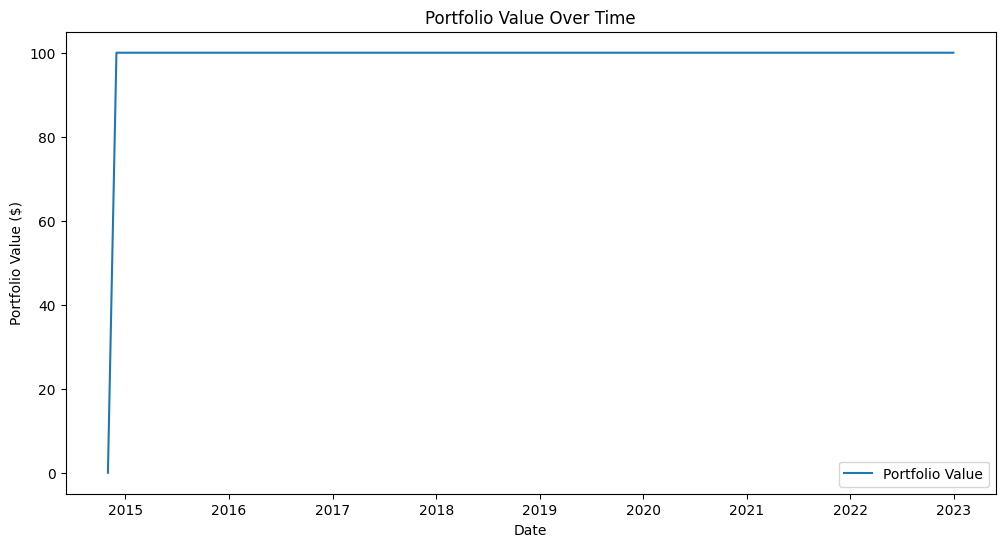

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [48]:
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns):
    return np.std(monthly_returns.dot(pd.Series(assets))) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility

cagr = calculate_cagr(portfolio_value)
volatility = calculate_volatility(monthly_returns)
sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)

print(f'CAGR: {cagr:.2%}')
print(f'Volatility: {volatility:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')


CAGR: inf%
Volatility: 21.31%
Sharpe Ratio: inf


/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/2238023847.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1
/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/2238023847.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1


In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime


In [50]:
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}


In [51]:
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  10 of 10 completed


In [54]:
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

In [55]:
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    for i in range(1, num_months):
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(pd.Series(asset_weights))
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

ValueError: matrices are not aligned

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the asset list and risk profiles
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Simulate monthly investments and calculate portfolio value
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    for i in range(1, num_months):
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(pd.Series(asset_weights))
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Evaluate performance metrics for each portfolio
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    return np.std(monthly_returns.dot(pd.Series(asset_weights))) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


[*********************100%%**********************]  10 of 10 completed


ValueError: matrices are not aligned

[*********************100%%**********************]  10 of 10 completed


Monthly Returns Shape: (99, 10)
Asset Weights Keys: dict_keys(['TLT', 'SCHD', 'AMT', 'GLD'])


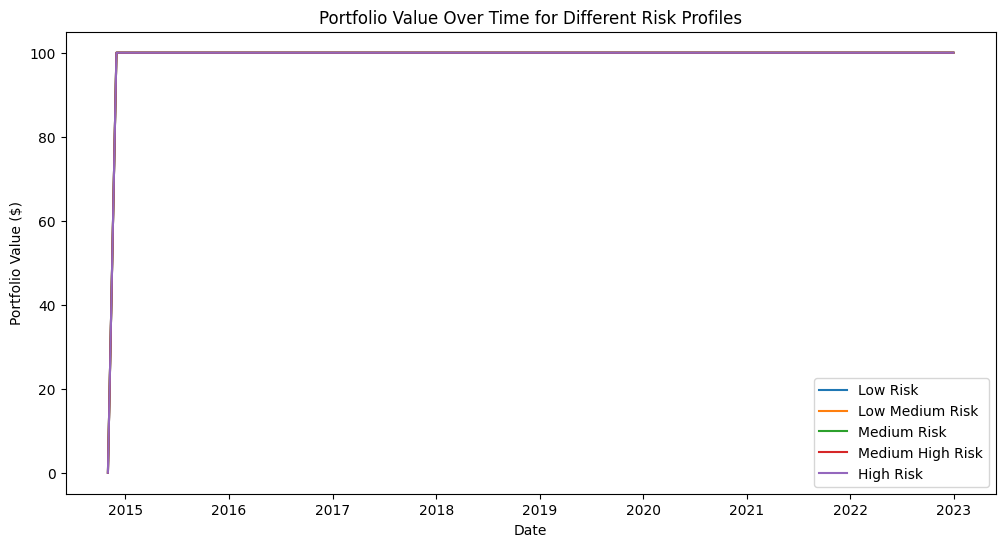

Low Risk - CAGR: inf%, Volatility: 8.20%, Sharpe Ratio: inf
Low Medium Risk - CAGR: inf%, Volatility: 8.31%, Sharpe Ratio: inf
Medium Risk - CAGR: inf%, Volatility: 14.98%, Sharpe Ratio: inf
Medium High Risk - CAGR: inf%, Volatility: 24.17%, Sharpe Ratio: inf
High Risk - CAGR: inf%, Volatility: 30.12%, Sharpe Ratio: inf


/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/3410486065.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1
/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/3410486065.py:63: RuntimeWarning: divide by zero encountered in scalar divide
  return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1
/var/folders/3x/j0kbtrs11j11nc47ldqz7vs00000gn/T/ipykernel_22040/3410486065.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1
/var/folders/3x/j0kbtrs11j11nc47

In [57]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the asset list and risk profiles
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Debugging: print shapes of dataframes
print("Monthly Returns Shape:", monthly_returns.shape)
print("Asset Weights Keys:", risk_profiles['Low Risk'].keys())

# Simulate monthly investments and calculate portfolio value
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights)
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Evaluate performance metrics for each portfolio
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    return (portfolio_value[-1] / portfolio_value[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


[*********************100%%**********************]  10 of 10 completed


Monthly Returns Shape: (99, 10)
Asset Weights Keys: dict_keys(['TLT', 'SCHD', 'AMT', 'GLD'])


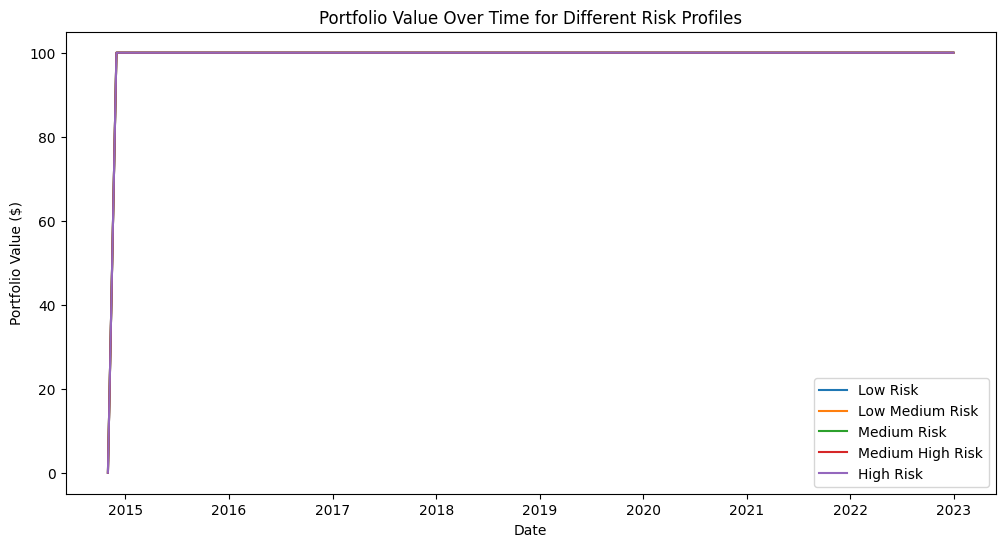

Low Risk - CAGR: 0.00%, Volatility: 8.20%, Sharpe Ratio: -0.12
Low Medium Risk - CAGR: 0.00%, Volatility: 8.31%, Sharpe Ratio: -0.12
Medium Risk - CAGR: 0.00%, Volatility: 14.98%, Sharpe Ratio: -0.07
Medium High Risk - CAGR: 0.00%, Volatility: 24.17%, Sharpe Ratio: -0.04
High Risk - CAGR: 0.00%, Volatility: 30.12%, Sharpe Ratio: -0.03


In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the asset list and risk profiles
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Debugging: print shapes of dataframes
print("Monthly Returns Shape:", monthly_returns.shape)
print("Asset Weights Keys:", risk_profiles['Low Risk'].keys())

# Simulate monthly investments and calculate portfolio value
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights)
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Evaluate performance metrics for each portfolio
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


[*********************100%%**********************]  10 of 10 completed


Monthly Returns Shape: (99, 10)
Asset Weights Keys: dict_keys(['TLT', 'SCHD', 'AMT', 'GLD'])


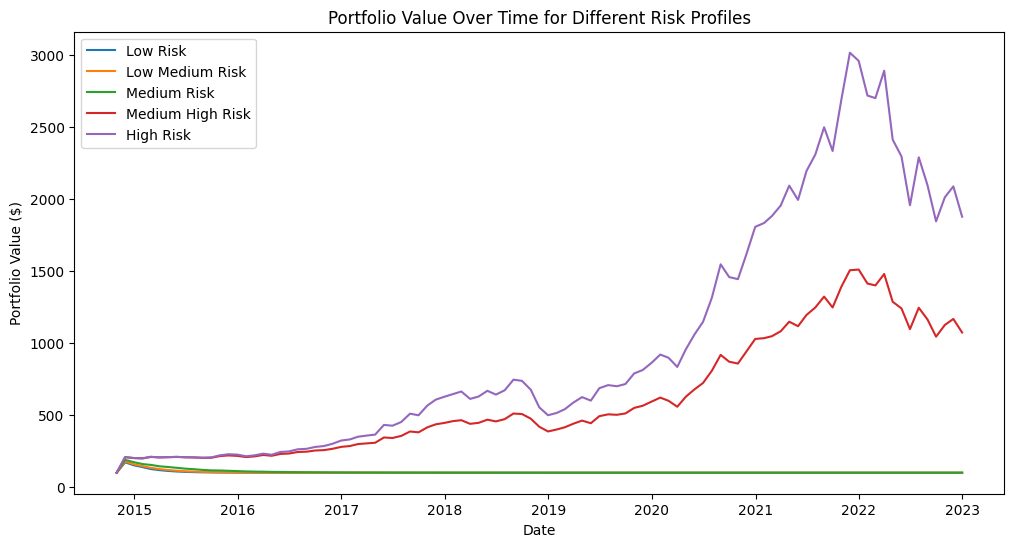

Low Risk - CAGR: 0.00%, Volatility: 8.20%, Sharpe Ratio: -0.12
Low Medium Risk - CAGR: 0.00%, Volatility: 8.31%, Sharpe Ratio: -0.12
Medium Risk - CAGR: 0.00%, Volatility: 14.98%, Sharpe Ratio: -0.07
Medium High Risk - CAGR: 33.33%, Volatility: 24.17%, Sharpe Ratio: 1.34
High Risk - CAGR: 42.68%, Volatility: 30.12%, Sharpe Ratio: 1.38


In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the asset list and risk profiles
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Debugging: print shapes of dataframes
print("Monthly Returns Shape:", monthly_returns.shape)
print("Asset Weights Keys:", risk_profiles['Low Risk'].keys())

# Simulate monthly investments and calculate portfolio value
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        investment_value.iloc[i] = investment_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights)
        portfolio_value.iloc[i] = investment_value.iloc[i] + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Evaluate performance metrics for each portfolio
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


[*********************100%%**********************]  10 of 10 completed


Monthly Returns Shape: (99, 10)
Asset Weights Keys: dict_keys(['TLT', 'SCHD', 'AMT', 'GLD'])


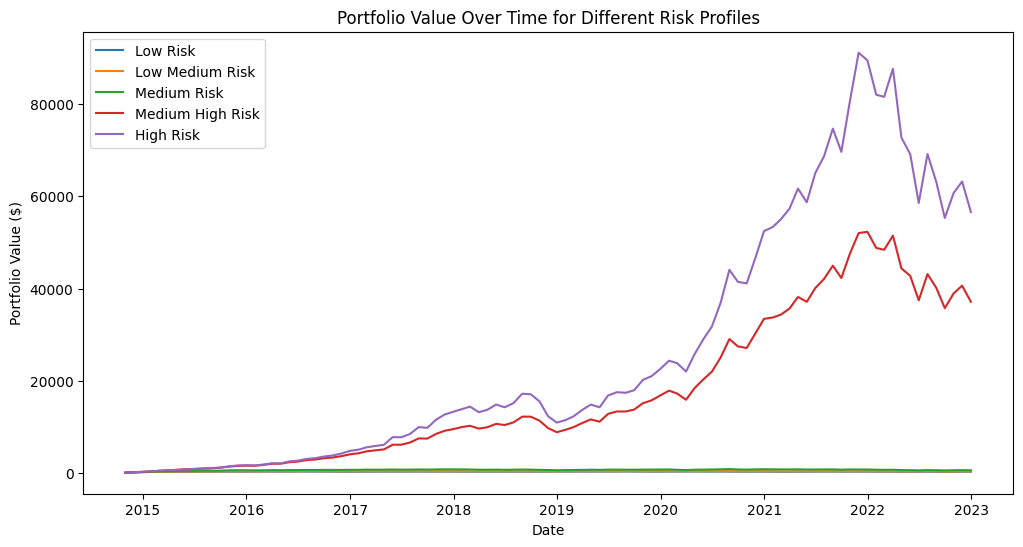

Low Risk - CAGR: 15.33%, Volatility: 8.20%, Sharpe Ratio: 1.75
Low Medium Risk - CAGR: 17.67%, Volatility: 8.31%, Sharpe Ratio: 2.01
Medium Risk - CAGR: 24.89%, Volatility: 14.98%, Sharpe Ratio: 1.59
Medium High Risk - CAGR: 104.89%, Volatility: 24.17%, Sharpe Ratio: 4.30
High Risk - CAGR: 115.62%, Volatility: 30.12%, Sharpe Ratio: 3.81


In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the asset list and risk profiles
assets = ['AAPL', 'MSFT', 'VOO', 'TLT', 'GLD', 'BTC-USD', 'AMT', 'NVDA', 'TSLA', 'AMD']

risk_profiles = {
    'Low Risk': {'TLT': 0.5, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1},
    'Low Medium Risk': {'TLT': 0.3, 'SCHD': 0.25, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.05},
    'Medium Risk': {'VOO': 0.3, 'MSFT': 0.2, 'AAPL': 0.2, 'SCHD': 0.15, 'GLD': 0.1, 'BTC-USD': 0.05},
    'Medium High Risk': {'AAPL': 0.4, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.1, 'GLD': 0.1},
    'High Risk': {'AAPL': 0.5, 'NVDA': 0.3, 'BTC-USD': 0.15, 'GLD': 0.05}
}

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()

# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Debugging: print shapes of dataframes
print("Monthly Returns Shape:", monthly_returns.shape)
print("Asset Weights Keys:", risk_profiles['Low Risk'].keys())

# Simulate monthly investments and calculate portfolio value
monthly_investment = 100

def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}

# Plot the portfolio values
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Evaluate performance metrics for each portfolio
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


In [64]:
instruments = {
    'Blue-Chip Stocks (US)': ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'PG', 'GE', 'NKE', 'KO', 'AMZN', 'WMT', 'MCD', 'XOM', 'PFE', 'MMM', 'CVX'],
    'Top S&P 500 Companies': ['BRK-B', 'V', 'HD', 'TSLA', 'BA', 'JPM', 'DIS', 'PEP', 'COST', 'CSCO'],
    'Dividend-Paying Blue-Chip Stocks': ['KO', 'JNJ', 'PG', 'T', 'IBM', 'PEP', 'MCD', 'XOM', 'PFE', 'MMM'],
    'Emerging Sectors (AI, EV, Semiconductors)': ['NVDA', 'AMD', 'NXPI', 'RIVN', 'LCID', 'TSLA', 'GOOGL', 'INTC', 'QCOM', 'AAPL'],
    'ETFs - General': ['VOO', 'IEMG', 'VTI', 'SCHX', 'SPY', 'IVW', 'IWM', 'ACWI', 'SPYG', 'QQQ'],
    'Dividend-Paying ETFs': ['VIG', 'SCHD', 'DVY', 'SDY', 'NOBL', 'HDV', 'VYM'],
    'Sector & Bond Market ETFs': ['XLU', 'TLT', 'VNQ', 'GLD', 'ICLN'],
    'Low Risk ETFs': ['SCHX', 'IVV', 'BSV', 'AGG', 'QQQ'],
    'Commodities': ['GLD', 'SLV'],
    'Cryptocurrencies': ['BTC-USD', 'ETH-USD'],
    'REITs': ['AMT', 'PLD', 'O', 'SPG', 'CCI']
}



In [65]:
risk_profiles = {
    'Low Risk': {
        'TLT': 0.3, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1, 'VIG': 0.2
    },
    'Low Medium Risk': {
        'TLT': 0.2, 'SCHD': 0.2, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.1, 'VIG': 0.1
    },
    'Medium Risk': {
        'VOO': 0.2, 'MSFT': 0.1, 'AAPL': 0.1, 'SCHD': 0.1, 'GLD': 0.1, 'BTC-USD': 0.1, 'NVDA': 0.1, 'AMZN': 0.1, 'TLT': 0.1
    },
    'Medium High Risk': {
        'AAPL': 0.2, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.2, 'GLD': 0.1, 'ETH-USD': 0.1
    },
    'High Risk': {
        'AAPL': 0.2, 'NVDA': 0.2, 'BTC-USD': 0.2, 'ETH-USD': 0.2, 'TSLA': 0.2
    }
}


In [66]:
# List of all unique instruments
all_instruments = list(set(sum(instruments.values(), [])))

# Fetch historical data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(all_instruments, start=start_date, end=end_date)['Adj Close']

# Fill missing values forward
data = data.ffill()


[*********************100%%**********************]  67 of 67 completed


In [67]:
# Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()


In [68]:
def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

portfolio_values = {risk: simulate_investment(monthly_returns, weights, monthly_investment) for risk, weights in risk_profiles.items()}


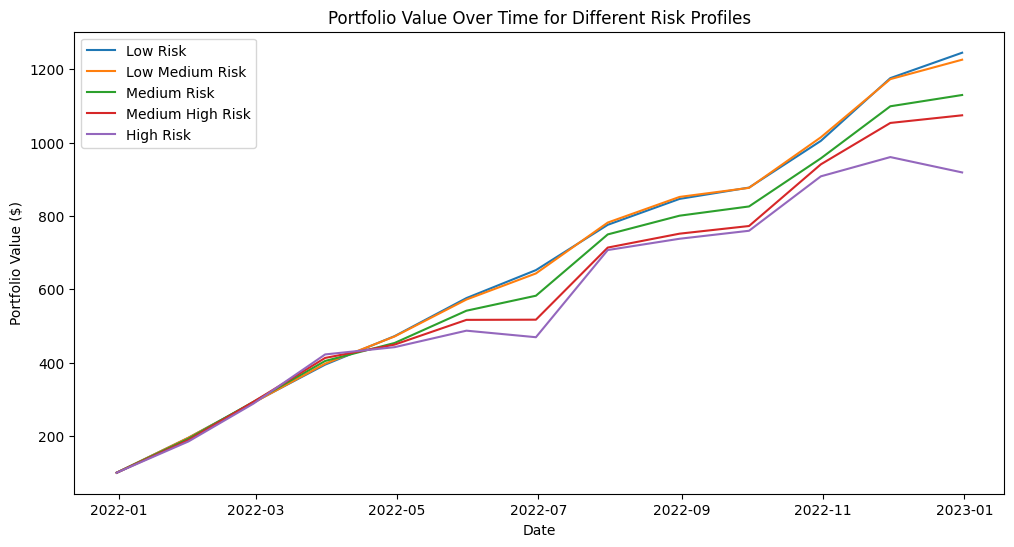

In [69]:
plt.figure(figsize=(12, 6))
for risk, portfolio_value in portfolio_values.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [70]:
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

performance_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = portfolio_values[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(monthly_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    performance_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

for risk, metrics in performance_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


Low Risk - CAGR: 925.26%, Volatility: 15.10%, Sharpe Ratio: 61.20
Low Medium Risk - CAGR: 910.78%, Volatility: 16.95%, Sharpe Ratio: 53.68
Medium Risk - CAGR: 837.31%, Volatility: 23.66%, Sharpe Ratio: 35.34
Medium High Risk - CAGR: 794.86%, Volatility: 35.41%, Sharpe Ratio: 22.42
High Risk - CAGR: 674.41%, Volatility: 48.22%, Sharpe Ratio: 13.97


[*********************100%%**********************]  65 of 65 completed
[*********************100%%**********************]  65 of 65 completed


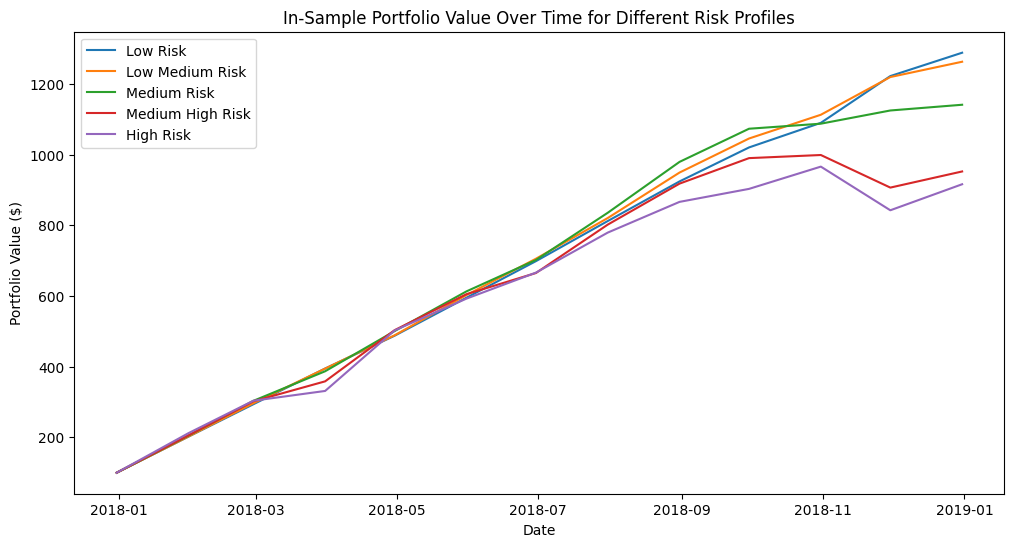

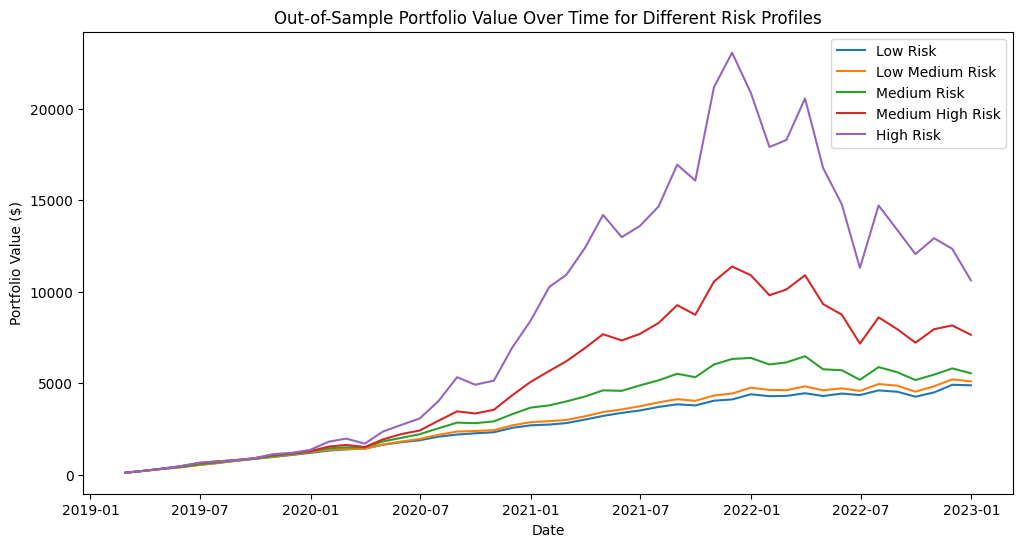

In-Sample Performance Metrics:
Low Risk - CAGR: 958.10%, Volatility: 7.56%, Sharpe Ratio: 126.63
Low Medium Risk - CAGR: 938.75%, Volatility: 8.36%, Sharpe Ratio: 112.22
Medium Risk - CAGR: 845.99%, Volatility: 16.51%, Sharpe Ratio: 51.17
Medium High Risk - CAGR: 700.58%, Volatility: 32.53%, Sharpe Ratio: 21.51
High Risk - CAGR: 672.46%, Volatility: 45.45%, Sharpe Ratio: 14.78

Out-of-Sample Performance Metrics:
Low Risk - CAGR: 169.78%, Volatility: 11.71%, Sharpe Ratio: 14.41
Low Medium Risk - CAGR: 172.78%, Volatility: 13.84%, Sharpe Ratio: 12.42
Medium Risk - CAGR: 178.63%, Volatility: 21.19%, Sharpe Ratio: 8.38
Medium High Risk - CAGR: 202.51%, Volatility: 34.14%, Sharpe Ratio: 5.90
High Risk - CAGR: 229.03%, Volatility: 51.29%, Sharpe Ratio: 4.45


In [73]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the instruments and risk profiles
instruments = {
    'Blue-Chip Stocks (US)': ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'PG', 'GE', 'NKE', 'KO', 'AMZN', 'WMT', 'MCD', 'XOM', 'PFE', 'MMM', 'CVX'],
    'Top S&P 500 Companies': ['BRK-B', 'V', 'HD', 'TSLA', 'BA', 'JPM', 'DIS', 'PEP', 'COST', 'CSCO'],
    'Dividend-Paying Blue-Chip Stocks': ['KO', 'JNJ', 'PG', 'T', 'IBM', 'PEP', 'MCD', 'XOM', 'PFE', 'MMM'],
    'Emerging Sectors (AI, EV, Semiconductors)': ['NVDA', 'AMD', 'NXPI', 'TSLA', 'GOOGL', 'INTC', 'QCOM', 'AAPL'],
    'ETFs - General': ['VOO', 'IEMG', 'VTI', 'SCHX', 'SPY', 'IVW', 'IWM', 'ACWI', 'SPYG', 'QQQ'],
    'Dividend-Paying ETFs': ['VIG', 'SCHD', 'DVY', 'SDY', 'NOBL', 'HDV', 'VYM'],
    'Sector & Bond Market ETFs': ['XLU', 'TLT', 'VNQ', 'GLD', 'ICLN'],
    'Low Risk ETFs': ['SCHX', 'IVV', 'BSV', 'AGG', 'QQQ'],
    'Commodities': ['GLD', 'SLV'],
    'Cryptocurrencies': ['BTC-USD', 'ETH-USD'],
    'REITs': ['AMT', 'PLD', 'O', 'SPG', 'CCI']
}

risk_profiles = {
    'Low Risk': {'TLT': 0.3, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1, 'VIG': 0.2},
    'Low Medium Risk': {'TLT': 0.2, 'SCHD': 0.2, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.1, 'VIG': 0.1},
    'Medium Risk': {'VOO': 0.2, 'MSFT': 0.1, 'AAPL': 0.1, 'SCHD': 0.1, 'GLD': 0.1, 'BTC-USD': 0.1, 'NVDA': 0.1, 'AMZN': 0.1, 'TLT': 0.1},
    'Medium High Risk': {'AAPL': 0.2, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.2, 'GLD': 0.1, 'ETH-USD': 0.1},
    'High Risk': {'AAPL': 0.2, 'NVDA': 0.2, 'BTC-USD': 0.2, 'ETH-USD': 0.2, 'TSLA': 0.2}
}

# Define in-sample and out-of-sample periods
in_sample_start = '2010-01-01'
in_sample_end = '2018-12-31'
out_sample_start = '2019-01-01'
out_sample_end = '2023-01-01'

# List of all unique instruments
all_instruments = list(set(sum(instruments.values(), [])))

# Fetch historical data for in-sample period
in_sample_data = yf.download(all_instruments, start=in_sample_start, end=in_sample_end)['Adj Close']
in_sample_data = in_sample_data.ffill()

# Fetch historical data for out-of-sample period
out_sample_data = yf.download(all_instruments, start=out_sample_start, end=out_sample_end)['Adj Close']
out_sample_data = out_sample_data.ffill()

# Calculate monthly returns for in-sample and out-of-sample periods
in_sample_returns = in_sample_data.resample('ME').ffill().pct_change().dropna()
out_sample_returns = out_sample_data.resample('ME').ffill().pct_change().dropna()

# Function to simulate investments
def simulate_investment(monthly_returns, asset_weights, monthly_investment):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

# Simulate investments for in-sample period
in_sample_portfolios = {risk: simulate_investment(in_sample_returns, weights, 100) for risk, weights in risk_profiles.items()}

# Simulate investments for out-of-sample period
out_sample_portfolios = {risk: simulate_investment(out_sample_returns, weights, 100) for risk, weights in risk_profiles.items()}

# Plot the portfolio values for in-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in in_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('In-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Plot the portfolio values for out-of-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in out_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Out-of-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Function to calculate CAGR
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

# Function to calculate volatility
def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

# Evaluate performance metrics for in-sample portfolios
in_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = in_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(in_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    in_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Evaluate performance metrics for out-of-sample portfolios
out_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = out_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(out_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    out_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Print in-sample performance metrics
print("In-Sample Performance Metrics:")
for risk, metrics in in_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")

# Print out-of-sample performance metrics
print("\nOut-of-Sample Performance Metrics:")
for risk, metrics in out_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


In [75]:
# Define the instruments and risk profiles
instruments = {
    'Blue-Chip Stocks (US)': ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'PG', 'GE', 'NKE', 'KO', 'AMZN', 'WMT', 'MCD', 'XOM', 'PFE', 'MMM', 'CVX'],
    'Top S&P 500 Companies': ['BRK-B', 'V', 'HD', 'TSLA', 'BA', 'JPM', 'DIS', 'PEP', 'COST', 'CSCO'],
    'Dividend-Paying Blue-Chip Stocks': ['KO', 'JNJ', 'PG', 'T', 'IBM', 'PEP', 'MCD', 'XOM', 'PFE', 'MMM'],
    'Emerging Sectors (AI, EV, Semiconductors)': ['NVDA', 'AMD', 'NXPI', 'TSLA', 'GOOGL', 'INTC', 'QCOM', 'AAPL'],
    'ETFs - General': ['VOO', 'IEMG', 'VTI', 'SCHX', 'SPY', 'IVW', 'IWM', 'ACWI', 'SPYG', 'QQQ'],
    'Dividend-Paying ETFs': ['VIG', 'SCHD', 'DVY', 'SDY', 'NOBL', 'HDV', 'VYM'],
    'Sector & Bond Market ETFs': ['XLU', 'TLT', 'VNQ', 'GLD', 'ICLN'],
    'Low Risk ETFs': ['SCHX', 'IVV', 'BSV', 'AGG', 'QQQ'],
    'Commodities': ['GLD', 'SLV'],
    'Cryptocurrencies': ['BTC-USD', 'ETH-USD'],
    'REITs': ['AMT', 'PLD', 'O', 'SPG', 'CCI']
}

risk_profiles = {
    'Low Risk': {'TLT': 0.3, 'SCHD': 0.3, 'AMT': 0.1, 'GLD': 0.1, 'VIG': 0.2},
    'Low Medium Risk': {'TLT': 0.2, 'SCHD': 0.2, 'VOO': 0.2, 'AMT': 0.1, 'AAPL': 0.1, 'GLD': 0.1, 'VIG': 0.1},
    'Medium Risk': {'VOO': 0.2, 'MSFT': 0.1, 'AAPL': 0.1, 'SCHD': 0.1, 'GLD': 0.1, 'BTC-USD': 0.1, 'NVDA': 0.1, 'AMZN': 0.1, 'TLT': 0.1},
    'Medium High Risk': {'AAPL': 0.2, 'NVDA': 0.2, 'VOO': 0.2, 'BTC-USD': 0.2, 'GLD': 0.1, 'ETH-USD': 0.1},
    'High Risk': {'AAPL': 0.2, 'NVDA': 0.2, 'BTC-USD': 0.2, 'ETH-USD': 0.2, 'TSLA': 0.2}
}


In [81]:
# Define in-sample and out-of-sample periods
in_sample_start = '2014-01-01'
in_sample_end = '2018-12-31'
out_sample_start = '2019-01-01'
out_sample_end = '2023-01-01'

# List of all unique instruments
all_instruments = list(set(sum(instruments.values(), [])))

# Fetch historical data for in-sample period
in_sample_data = yf.download(all_instruments, start=in_sample_start, end=in_sample_end)['Adj Close']
in_sample_data = in_sample_data.ffill()

# Fetch historical data for out-of-sample period
out_sample_data = yf.download(all_instruments, start=out_sample_start, end=out_sample_end)['Adj Close']
out_sample_data = out_sample_data.ffill()


[*********************100%%**********************]  65 of 65 completed
[*********************100%%**********************]  65 of 65 completed


In [82]:
# Calculate monthly returns for in-sample and out-of-sample periods
in_sample_returns = in_sample_data.resample('ME').ffill().pct_change().dropna()
out_sample_returns = out_sample_data.resample('ME').ffill().pct_change().dropna()


In [83]:
# Function to simulate investments with rebalancing
def simulate_investment(monthly_returns, asset_weights, monthly_investment, rebalance=False):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        if rebalance and i % 12 == 0:  # Rebalance annually
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
        else:
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

# Simulate investments for in-sample period with rebalancing
in_sample_portfolios = {risk: simulate_investment(in_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}

# Simulate investments for out-of-sample period with rebalancing
out_sample_portfolios = {risk: simulate_investment(out_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}


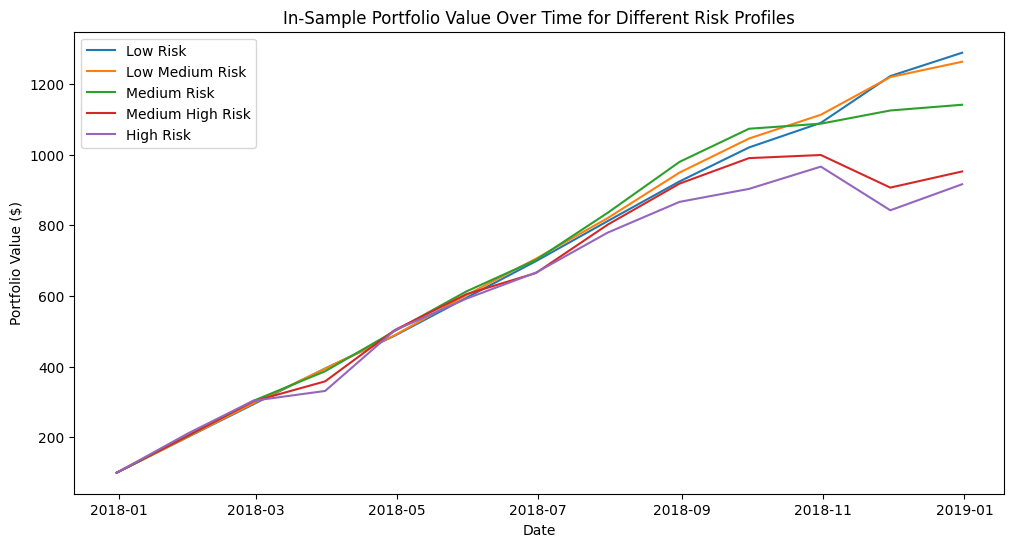

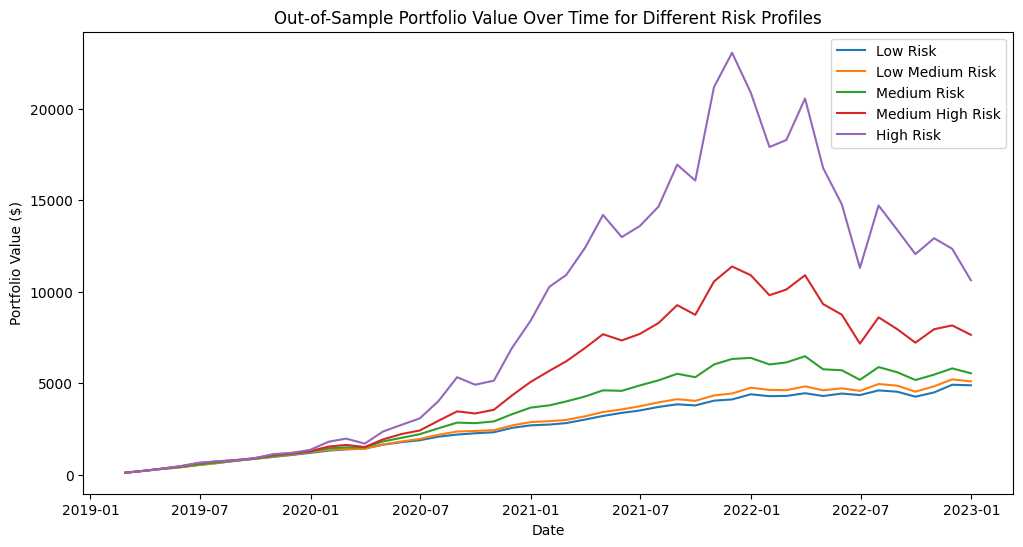

In [87]:
# Plot the portfolio values for in-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in in_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('In-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Plot the portfolio values for out-of-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in out_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Out-of-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [86]:
# Function to calculate CAGR
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:  # Prevent divide by zero error
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

# Function to calculate volatility
def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

# Evaluate performance metrics for in-sample portfolios
in_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = in_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(in_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    in_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Evaluate performance metrics for out-of-sample portfolios
out_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = out_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(out_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    out_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Print in-sample performance metrics
print("In-Sample Performance Metrics:")
for risk, metrics in in_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")

# Print out-of-sample performance metrics
print("\nOut-of-Sample Performance Metrics:")
for risk, metrics in out_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


In-Sample Performance Metrics:
Low Risk - CAGR: 958.10%, Volatility: 7.56%, Sharpe Ratio: 126.63
Low Medium Risk - CAGR: 938.75%, Volatility: 8.36%, Sharpe Ratio: 112.22
Medium Risk - CAGR: 845.99%, Volatility: 16.51%, Sharpe Ratio: 51.17
Medium High Risk - CAGR: 700.58%, Volatility: 32.53%, Sharpe Ratio: 21.50
High Risk - CAGR: 672.46%, Volatility: 45.45%, Sharpe Ratio: 14.78

Out-of-Sample Performance Metrics:
Low Risk - CAGR: 169.78%, Volatility: 11.71%, Sharpe Ratio: 14.41
Low Medium Risk - CAGR: 172.78%, Volatility: 13.84%, Sharpe Ratio: 12.42
Medium Risk - CAGR: 178.63%, Volatility: 21.19%, Sharpe Ratio: 8.38
Medium High Risk - CAGR: 202.51%, Volatility: 34.14%, Sharpe Ratio: 5.90
High Risk - CAGR: 229.03%, Volatility: 51.29%, Sharpe Ratio: 4.45


In [88]:
# Check for missing values
print(in_sample_data.isnull().sum())
print(out_sample_data.isnull().sum())

# Check for extreme outliers
print(in_sample_data.describe())
print(out_sample_data.describe())


Ticker
AAPL    0
ACWI    0
AGG     0
AMD     0
AMT     0
       ..
VTI     0
VYM     0
WMT     0
XLU     0
XOM     0
Length: 65, dtype: int64
Ticker
AAPL    1
ACWI    1
AGG     1
AMD     1
AMT     1
       ..
VTI     1
VYM     1
WMT     1
XLU     1
XOM     1
Length: 65, dtype: int64
Ticker         AAPL         ACWI          AGG          AMD          AMT  \
count   1744.000000  1744.000000  1744.000000  1744.000000  1744.000000   
mean      30.821485    54.061895    89.765238     8.333739    96.771613   
std        9.226200     6.918760     2.602806     6.510406    21.604362   
min       15.607213    42.270134    82.455437     1.620000    63.198025   
25%       24.185755    48.739262    87.871216     2.727500    78.541925   
50%       27.699330    50.956280    90.506508     6.310000    89.396160   
75%       37.561886    60.657225    91.931793    12.430000   118.986231   
max       55.346420    69.071228    93.590408    32.720001   147.222672   

Ticker         AMZN           BA        

In [89]:
# Ensure the monthly returns calculation is correct
monthly_returns = in_sample_data.pct_change().dropna()

# Verify annualization of returns and volatility
def annualize_returns(monthly_returns):
    return ((1 + monthly_returns).prod() ** (12 / len(monthly_returns))) - 1

def annualize_volatility(monthly_volatility):
    return monthly_volatility * np.sqrt(12)

# Calculate CAGR
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

# Calculate volatility
def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0


In [90]:
# Function to simulate investments with rebalancing
def simulate_investment(monthly_returns, asset_weights, monthly_investment, rebalance=False):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        if rebalance and i % 12 == 0:  # Rebalance annually
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
        else:
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

# Simulate investments with adjusted rebalancing logic
in_sample_portfolios = {risk: simulate_investment(in_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}
out_sample_portfolios = {risk: simulate_investment(out_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}


In [91]:
# Define additional out-of-sample periods
out_sample_start_2 = '2023-01-01'
out_sample_end_2 = '2024-01-01'

# Fetch historical data for the additional out-of-sample period
out_sample_data_2 = yf.download(all_instruments, start=out_sample_start_2, end=out_sample_end_2)['Adj Close']
out_sample_data_2 = out_sample_data_2.ffill()

# Calculate monthly returns for the additional out-of-sample period
out_sample_returns_2 = out_sample_data_2.resample('ME').ffill().pct_change().dropna()

# Simulate investments for the additional out-of-sample period
out_sample_portfolios_2 = {risk: simulate_investment(out_sample_returns_2, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}

# Evaluate performance metrics for the additional out-of-sample period
out_sample_metrics_2 = {}
for risk, weights in risk_profiles.items():
    portfolio_value = out_sample_portfolios_2[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(out_sample_returns_2, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    out_sample_metrics_2[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Print the additional out-of-sample performance metrics
print("\nAdditional Out-of-Sample Performance Metrics:")
for risk, metrics in out_sample_metrics_2.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


[*********************100%%**********************]  65 of 65 completed



Additional Out-of-Sample Performance Metrics:
Low Risk - CAGR: 1368.76%, Volatility: 14.80%, Sharpe Ratio: 92.43
Low Medium Risk - CAGR: 1387.39%, Volatility: 14.73%, Sharpe Ratio: 94.12
Medium Risk - CAGR: 1509.24%, Volatility: 15.30%, Sharpe Ratio: 98.60
Medium High Risk - CAGR: 1601.90%, Volatility: 18.23%, Sharpe Ratio: 87.82
High Risk - CAGR: 1645.29%, Volatility: 23.80%, Sharpe Ratio: 69.10


In [93]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Define the instruments and risk profiles
instruments = {
    'Blue-Chip Stocks (US)': ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'PG', 'GE', 'NKE', 'KO', 'AMZN', 'WMT', 'MCD', 'XOM', 'PFE', 'MMM', 'CVX'],
    'Top S&P 500 Companies': ['BRK-B', 'V', 'HD', 'TSLA', 'BA', 'JPM', 'DIS', 'PEP', 'COST', 'CSCO'],
    'Dividend-Paying Blue-Chip Stocks': ['KO', 'JNJ', 'PG', 'T', 'IBM', 'PEP', 'MCD', 'XOM', 'PFE', 'MMM'],
    'Emerging Sectors (AI, EV, Semiconductors)': ['NVDA', 'AMD', 'NXPI','TSLA', 'GOOGL', 'INTC', 'QCOM', 'AAPL'],
    'ETFs - General': ['VOO', 'IEMG', 'VTI', 'SCHX', 'SPY', 'IVW', 'IWM', 'ACWI', 'SPYG', 'QQQ'],
    'Dividend-Paying ETFs': ['VIG', 'SCHD', 'DVY', 'SDY', 'NOBL', 'HDV', 'VYM'],
    'Sector & Bond Market ETFs': ['XLU', 'TLT', 'VNQ', 'GLD', 'ICLN'],
    'Low Risk ETFs': ['SCHX', 'IVV', 'BSV', 'AGG', 'QQQ'],
    'Commodities': ['GLD', 'SLV'],
    'Cryptocurrencies': ['BTC-USD', 'ETH-USD'],
    'REITs': ['AMT', 'PLD', 'O', 'SPG', 'CCI']
}

# Define in-sample and out-of-sample periods
in_sample_start = '2020-05-01'
in_sample_end = '2022-04-30'
out_sample_start = '2022-05-01'
out_sample_end = '2024-05-01'

# List of all unique instruments
all_instruments = list(set(sum(instruments.values(), [])))

# Fetch historical data for in-sample period and align to weekdays
in_sample_data = yf.download(all_instruments, start=in_sample_start, end=in_sample_end)['Adj Close']
in_sample_data = in_sample_data.asfreq('B').ffill()  # Align to business days (weekdays) and forward fill missing values

# Fetch historical data for out-of-sample period and align to weekdays
out_sample_data = yf.download(all_instruments, start=out_sample_start, end=out_sample_end)['Adj Close']
out_sample_data = out_sample_data.asfreq('B').ffill()  # Align to business days (weekdays) and forward fill missing values

# Define additional out-of-sample periods
out_sample_start_2 = '2023-01-01'
out_sample_end_2 = '2024-01-01'

# Fetch historical data for the additional out-of-sample period and align to weekdays
out_sample_data_2 = yf.download(all_instruments, start=out_sample_start_2, end=out_sample_end_2)['Adj Close']
out_sample_data_2 = out_sample_data_2.asfreq('B').ffill()  # Align to business days (weekdays) and forward fill missing values


[*********************100%%**********************]  65 of 65 completed
[*********************100%%**********************]  65 of 65 completed
[*********************100%%**********************]  65 of 65 completed


In [95]:
# Calculate monthly returns for in-sample and out-of-sample periods
in_sample_returns = in_sample_data.resample('ME').ffill().pct_change().dropna()
out_sample_returns = out_sample_data.resample('ME').ffill().pct_change().dropna()
out_sample_returns_2 = out_sample_data_2.resample('ME').ffill().pct_change().dropna()


In [96]:
# Function to simulate investments with rebalancing
def simulate_investment(monthly_returns, asset_weights, monthly_investment, rebalance=False):
    num_months = len(monthly_returns)
    portfolio_value = pd.Series(0.0, index=monthly_returns.index)
    investment_value = pd.Series(0.0, index=monthly_returns.index)
    
    # Start with the first investment
    investment_value.iloc[0] = monthly_investment
    portfolio_value.iloc[0] = monthly_investment
    
    for i in range(1, num_months):
        aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
        if rebalance and i % 12 == 0:  # Rebalance annually
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
        else:
            portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + monthly_returns.iloc[i]).dot(aligned_weights) + monthly_investment
    
    return portfolio_value

# Simulate investments for in-sample period with rebalancing
in_sample_portfolios = {risk: simulate_investment(in_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}

# Simulate investments for out-of-sample period with rebalancing
out_sample_portfolios = {risk: simulate_investment(out_sample_returns, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}
out_sample_portfolios_2 = {risk: simulate_investment(out_sample_returns_2, weights, 100, rebalance=True) for risk, weights in risk_profiles.items()}


In [97]:
# Function to calculate CAGR
def calculate_cagr(portfolio_value):
    n = len(portfolio_value) / 12
    if portfolio_value.iloc[0] == 0:
        return 0
    return (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (1/n) - 1

# Function to calculate volatility
def calculate_volatility(monthly_returns, asset_weights):
    aligned_weights = pd.Series(asset_weights).reindex(monthly_returns.columns).fillna(0)
    return np.std(monthly_returns.dot(aligned_weights)) * np.sqrt(12)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(cagr, volatility, risk_free_rate=0.01):
    return (cagr - risk_free_rate) / volatility if volatility != 0 else 0

# Evaluate performance metrics for in-sample portfolios
in_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = in_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(in_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    in_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Evaluate performance metrics for out-of-sample portfolios
out_sample_metrics = {}
for risk, weights in risk_profiles.items():
    portfolio_value = out_sample_portfolios[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(out_sample_returns, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    out_sample_metrics[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}

# Evaluate performance metrics for the additional out-of-sample period
out_sample_metrics_2 = {}
for risk, weights in risk_profiles.items():
    portfolio_value = out_sample_portfolios_2[risk]
    cagr = calculate_cagr(portfolio_value)
    volatility = calculate_volatility(out_sample_returns_2, weights)
    sharpe_ratio = calculate_sharpe_ratio(cagr, volatility)
    out_sample_metrics_2[risk] = {'CAGR': cagr, 'Volatility': volatility, 'Sharpe Ratio': sharpe_ratio}


In [98]:
# Print in-sample performance metrics
print("In-Sample Performance Metrics:")
for risk, metrics in in_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")

# Print out-of-sample performance metrics
print("\nOut-of-Sample Performance Metrics:")
for risk, metrics in out_sample_metrics.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")

# Print additional out-of-sample performance metrics
print("\nAdditional Out-of-Sample Performance Metrics:")
for risk, metrics in out_sample_metrics_2.items():
    print(f"{risk} - CAGR: {metrics['CAGR']:.2%}, Volatility: {metrics['Volatility']:.2%}, Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")


In-Sample Performance Metrics:
Low Risk - CAGR: 412.55%, Volatility: 10.64%, Sharpe Ratio: 38.69
Low Medium Risk - CAGR: 420.17%, Volatility: 12.49%, Sharpe Ratio: 33.55
Medium Risk - CAGR: 434.91%, Volatility: 20.04%, Sharpe Ratio: 21.66
Medium High Risk - CAGR: 499.75%, Volatility: 32.95%, Sharpe Ratio: 15.14
High Risk - CAGR: 561.03%, Volatility: 51.33%, Sharpe Ratio: 10.91

Out-of-Sample Performance Metrics:
Low Risk - CAGR: 420.52%, Volatility: 15.12%, Sharpe Ratio: 27.75
Low Medium Risk - CAGR: 428.57%, Volatility: 15.96%, Sharpe Ratio: 26.78
Medium Risk - CAGR: 509.01%, Volatility: 23.11%, Sharpe Ratio: 21.99
Medium High Risk - CAGR: 579.50%, Volatility: 34.65%, Sharpe Ratio: 16.69
High Risk - CAGR: 576.25%, Volatility: 46.87%, Sharpe Ratio: 12.27

Additional Out-of-Sample Performance Metrics:
Low Risk - CAGR: 1368.76%, Volatility: 14.80%, Sharpe Ratio: 92.43
Low Medium Risk - CAGR: 1387.39%, Volatility: 14.73%, Sharpe Ratio: 94.12
Medium Risk - CAGR: 1508.61%, Volatility: 15.30

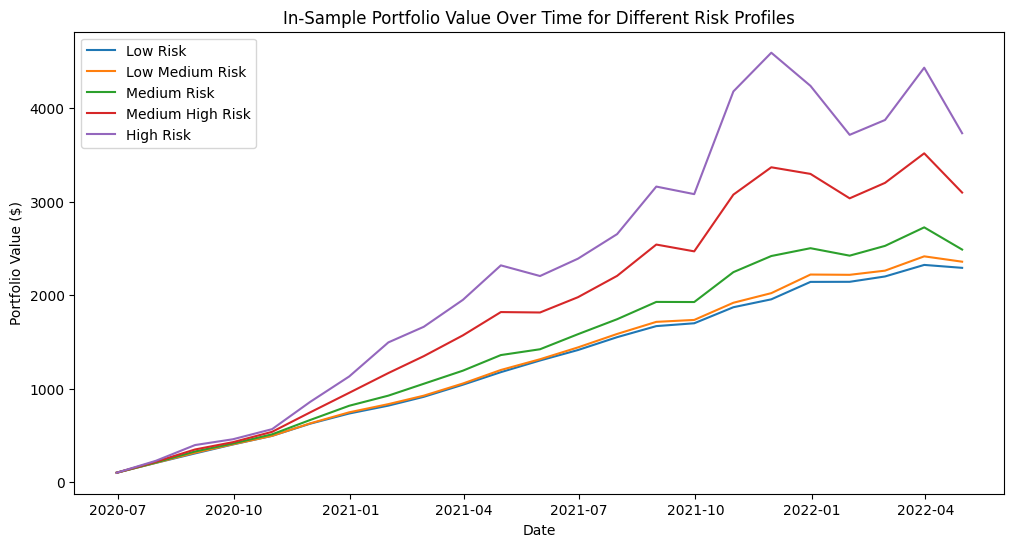

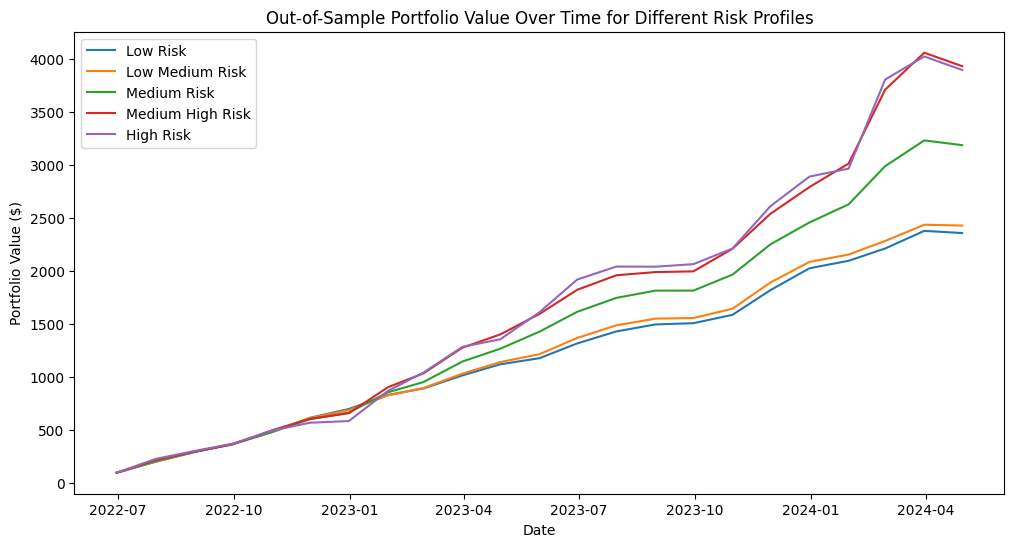

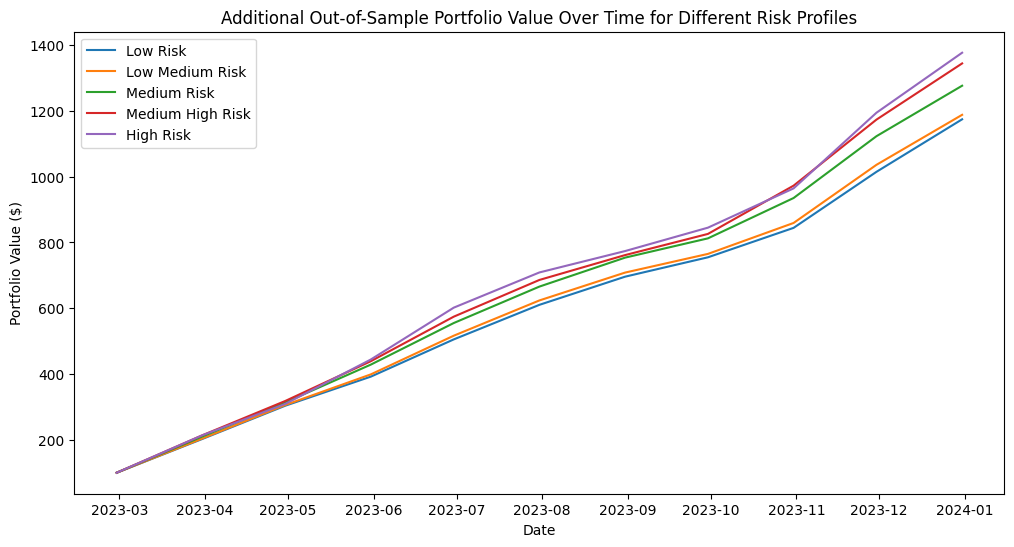

In [99]:
# Plot the portfolio values for in-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in in_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('In-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Plot the portfolio values for out-of-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in out_sample_portfolios.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Out-of-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

# Plot the portfolio values for additional out-of-sample period
plt.figure(figsize=(12, 6))
for risk, portfolio_value in out_sample_portfolios_2.items():
    plt.plot(portfolio_value, label=risk)
plt.title('Additional Out-of-Sample Portfolio Value Over Time for Different Risk Profiles')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [100]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def calculate_portfolio_return():
    try:
        stock_return = float(stock_return_var.get()) / 100
        stock_weight = float(stock_weight_var.get()) / 100
        bond_return = float(bond_return_var.get()) / 100
        bond_weight = float(bond_weight_var.get()) / 100
        cash_return = float(cash_return_var.get()) / 100
        cash_weight = float(cash_weight_var.get()) / 100
        
        portfolio_return = (stock_return * stock_weight + 
                            bond_return * bond_weight + 
                            cash_return * cash_weight)

        result_label.config(text=f"Total Portfolio Return: {portfolio_return:.2%}")
        show_pie_chart([stock_weight, bond_weight, cash_weight])
    except ValueError:
        result_label.config(text="Please enter valid numbers.")

def show_pie_chart(weights):
    labels = 'Stocks', 'Bonds', 'Cash'
    colors = ['gold', 'lightblue', 'lightgreen']
    explode = (0.1, 0, 0)  # only "explode" the 1st slice (Stocks)

    fig, ax = plt.subplots()
    ax.pie(weights, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Remove any existing canvases before adding a new one
    for widget in chart_frame.winfo_children():
        widget.destroy()

    canvas = FigureCanvasTkAgg(fig, master=chart_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

app = tk.Tk()
app.title("Portfolio Return and Weight Distribution")

# Variables
stock_return_var = tk.StringVar()
stock_weight_var = tk.StringVar()
bond_return_var = tk.StringVar()
bond_weight_var = tk.StringVar()
cash_return_var = tk.StringVar()
cash_weight_var = tk.StringVar()

# Layout setup
input_frame = tk.Frame(app)
input_frame.pack(side=tk.TOP)
chart_frame = tk.Frame(app)
chart_frame.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

# Labels and Entries
fields = ['Stock Return (%)', 'Stock Weight (%)', 'Bond Return (%)', 'Bond Weight (%)', 'Cash Return (%)', 'Cash Weight (%)']
vars = [stock_return_var, stock_weight_var, bond_return_var, bond_weight_var, cash_return_var, cash_weight_var]

for i, (field, var) in enumerate(zip(fields, vars)):
    tk.Label(input_frame, text=field).grid(row=i, column=0)
    tk.Entry(input_frame, textvariable=var).grid(row=i, column=1)

# Button and Result
tk.Button(input_frame, text="Calculate Return", command=calculate_portfolio_return).grid(row=len(fields), column=0, columnspan=2)
result_label = tk.Label(input_frame, text="")
result_label.grid(row=len(fields) + 1, column=0, columnspan=2)

app.mainloop()


2024-06-27 15:40:06.432 Python[22040:5260112] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


: 

Total Portfolio Return: 7.70%


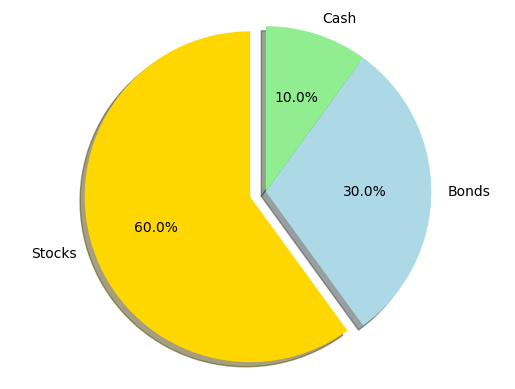

In [1]:
import matplotlib.pyplot as plt

# Define the assets in the portfolio with their returns and weights
assets = {
    'Stocks': {'return': 0.10, 'weight': 0.60},  # 10% return, 60% of the portfolio
    'Bonds': {'return': 0.05, 'weight': 0.30},   # 5% return, 30% of the portfolio
    'Cash': {'return': 0.02, 'weight': 0.10}     # 2% return, 10% of the portfolio
}

# Calculate the weighted return of the portfolio
portfolio_return = sum(asset['return'] * asset['weight'] for asset in assets.values())

# Labels for the sectors
labels = assets.keys()

# Sizes for each slice
sizes = [asset['weight'] for asset in assets.values()]

# Colors for each sector
colors = ['gold', 'lightblue', 'lightgreen']

# Exploding the 1st slice (stocks)
explode = (0.1, 0, 0)

# Plotting the Pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the total portfolio return and show the pie chart
print(f"Total Portfolio Return: {portfolio_return:.2%}")
plt.show()
